In [1]:
# ========================
# 1. Importación de librerías y carga de datos
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Scikit-learn: Modelos y preprocesamiento
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans

# Modelos adicionales: XGBoost, LightGBM y CatBoost
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# ========================
# 2. Carga de los datos
# ========================

# Cargar datasets de entrenamiento y prueba
train_path = "/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/Team_Challenge_Pipelines/src/data/Train.csv"
test_path = "/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/Team_Challenge_Pipelines/src/data/Test.csv"

df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Exploración inicial de los datos
print(" Información del dataset de entrenamiento:")
print(df.info())
print("\n Primeras filas del dataset de entrenamiento:")
print(df.head())

print("\n Información del dataset de test:")
print(test_df.info())
print("\n Primeras filas del dataset de test:")
print(test_df.head())

 Información del dataset de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None

 Primeras filas del dataset de entrenamiento:
       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healt


 Valores nulos en dataset de entrenamiento:
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

 Valores nulos en dataset de test:
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64


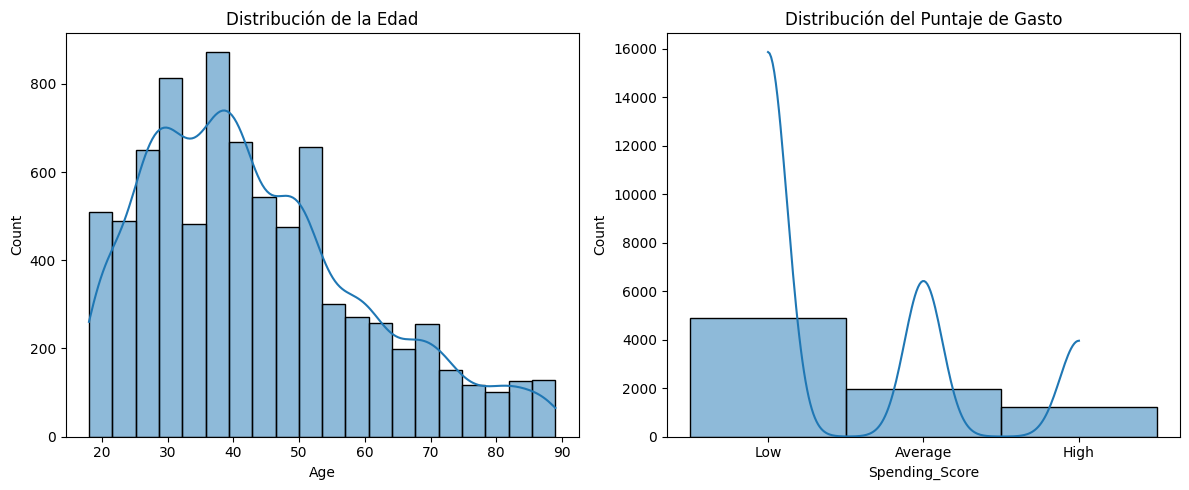

In [3]:
# ========================
# 3. Análisis de valores nulos y distribuciones
# ========================

# Verificar valores nulos en cada dataset
print("\n Valores nulos en dataset de entrenamiento:")
print(df.isnull().sum())

print("\n Valores nulos en dataset de test:")
print(test_df.isnull().sum())

# Visualización de la distribución de algunas variables clave
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribución de la Edad')

sns.histplot(df['Spending_Score'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribución del Puntaje de Gasto')

plt.tight_layout()
plt.show()

In [ ]:
# Identificar columnas numéricas y categóricas
numeric_features = df.select_dtypes(include=["number"]).columns.tolist()
categorical_features = df.select_dtypes(exclude=["number"]).columns.tolist()

# ========================
# Definir la Pipeline de Preprocesamiento
# ========================

# Pipeline para columnas numéricas: imputación con la media y estandarización
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),  # Imputación con la media
    ("scaler", StandardScaler())  # Estandarización
])

# Pipeline para columnas categóricas: imputación con la moda y OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación con la moda
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Codificación OneHot
])

# Combinar ambas transformaciones en un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# ========================
#  Aplicar la Pipeline al Dataset de train
# ========================

# Transformar los datos
df_processed = preprocessor.fit_transform(df)

# Convertir a DataFrame para inspección
df_processed = pd.DataFrame(df_processed)

# Mostrar información final del dataset transformado
print("\n Pipeline de procesamiento de datos completada.")
print("Dimensiones del dataset procesado:", df_processed.shape)



 Pipeline de procesamiento de datos completada.
Dimensiones del dataset procesado: (8068, 33)


In [6]:
# ========================
#  Aplicar la Pipeline de Preprocesamiento al Conjunto de Test
# ========================

# Transformar los datos de test usando la pipeline entrenada con train
df_test_processed = preprocessor.transform(test_df)

# Convertir a DataFrame para inspección
df_test_processed = pd.DataFrame(df_test_processed)

# Mostrar información final del dataset de test transformado
print("\n Pipeline aplicada correctamente al conjunto de test.")
print("Dimensiones del dataset de test procesado:", df_test_processed.shape)


 Pipeline aplicada correctamente al conjunto de test.
Dimensiones del dataset de test procesado: (2627, 33)


In [8]:
# Verificar valores nulos en cada dataset
print("\n Valores nulos en dataset de entrenamiento:")
print(df_processed.isnull().sum())

print("\n Valores nulos en dataset de test:")
print(df_test_processed.isnull().sum())


 Valores nulos en dataset de entrenamiento:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
dtype: int64

 Valores nulos en dataset de test:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
dtype: int64


In [9]:
# Transformer que realiza:
# - Escalado de los datos (para clustering)
# - Búsqueda del número óptimo de clusters usando silhouette_score
# - Cálculo de los centros de los clusters y, basándose en los nombres de las columnas, sugiere una etiqueta para cada cluster
# - Solicita al usuario, para cada cluster, ingresar una etiqueta (presionando Enter se acepta la sugerencia)
    
class ClusteringAndMapping(BaseEstimator, TransformerMixin):
    def __init__(self, k_range=range(2, 11), random_state=42):
        self.k_range = k_range
        self.random_state = random_state

    def fit(self, X, y=None):
        # Si X es DataFrame, se extraen los nombres de las columnas y se obtiene la matriz numérica
        if hasattr(X, 'columns'):
            self.feature_names_ = X.columns.tolist()
            X_numeric = X.values
        else:
            self.feature_names_ = None
            X_numeric = X

        # Escalado de datos
        self.scaler_ = StandardScaler()
        X_scaled = self.scaler_.fit_transform(X_numeric)

        best_score = -1
        best_k = None
        best_model = None

        # Se recorre el rango de k para encontrar el que maximice el silhouette_score
        for k in self.k_range:
            model = KMeans(n_clusters=k, random_state=self.random_state)
            labels = model.fit_predict(X_scaled)
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_k = k
                best_model = model

        self.best_k_ = best_k
        self.best_model_ = best_model
        print("Número óptimo de clusters encontrado:", best_k)

        # Calcular centros de clusters (en espacio escalado)
        self.centers_ = self.best_model_.cluster_centers_
        
        # Sugerir una etiqueta para cada cluster:
        self.mapping_ = {}
        print("\n--- Sugerencias de Etiquetas para cada Cluster ---")
        for cluster in range(self.best_k_):
            center = self.centers_[cluster]
            # Si se tienen nombres de columnas, se busca la característica con mayor valor absoluto
            if self.feature_names_ is not None:
                idx = np.argmax(np.abs(center))
                feature = self.feature_names_[idx]
                if center[idx] >= 0:
                    suggestion = f'Alto {feature}'
                else:
                    suggestion = f'Bajo {feature}'
            else:
                suggestion = f'Cluster {cluster}'
            # Solicitar input interactivo al usuario
            user_input = input(f"Para el cluster {cluster} se sugiere: '{suggestion}'. Ingrese la etiqueta deseada (o presione Enter para aceptar): ")
            self.mapping_[cluster] = user_input if user_input.strip() != "" else suggestion

        print("\nMapping final:", self.mapping_)
        return self

    def transform(self, X):
        # Se asegura de aplicar el mismo escalado
        if hasattr(X, 'columns'):
            X_numeric = X.values
        else:
            X_numeric = X
        X_scaled = self.scaler_.transform(X_numeric)
        # Se predicen los clusters usando el modelo óptimo encontrado
        cluster_labels = self.best_model_.predict(X_scaled)
        # Se mapea cada cluster a la etiqueta definida por el usuario o sugerida
        mapped_labels = np.array([self.mapping_[label] for label in cluster_labels])
        return mapped_labels

In [10]:
def evaluate_clusters(X, labels, centers):
    # Silhouette score
    sil_score = silhouette_score(X, labels)
    
    # Davies-Bouldin score
    from sklearn.metrics import davies_bouldin_score
    db_score = davies_bouldin_score(X, labels)
    
    # Calculate cluster sizes
    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    
    # Feature importance per cluster
    feature_importance = pd.DataFrame(
        centers,
        columns=X.columns
    ).apply(lambda x: np.abs(x - x.mean()) / x.std())
    
    print(f"Silhouette Score: {sil_score:.3f}")
    print(f"Davies-Bouldin Score: {db_score:.3f}")
    print("\nCluster Sizes:")
    print(cluster_sizes)
    print("\nTop Features per Cluster:")
    for i in range(len(centers)):
        top_features = feature_importance.iloc[i].nlargest(3)
        print(f"\nCluster {i} - Top Features:")
        print(top_features)

def analyze_cluster_profiles(df, labels):
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = labels
    
    profiles = []
    for cluster in np.unique(labels):
        cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
        profile = {
            'Cluster': cluster,
            'Size': len(cluster_data),
            'Avg_Age': cluster_data['Age'].mean(),
            'Spending_Distribution': cluster_data['Spending_Score'].value_counts(normalize=True),
            'Top_Professions': cluster_data['Profession'].value_counts().nlargest(3),
            'Married_Ratio': (cluster_data['Ever_Married'] == 'Yes').mean(),
            'Graduated_Ratio': (cluster_data['Graduated'] == 'Yes').mean()
        }
        profiles.append(profile)
    
    return profiles

def analyze_feature_importance(pipeline, X):
    # Obtener datos transformados
    preprocessed_data = pipeline.named_steps['preprocessor'].transform(X)
    feature_selected_data = pipeline.named_steps['feature_selector'].transform(preprocessed_data)
    
    # Obtener nombres de características
    numeric_features = ['Age', 'Work_Experience', 'Family_Size', 'Spending_Power']
    categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Age_Group']
    
    # Obtener nombres de características después de one-hot encoding
    cat_encoder = pipeline.named_steps['feature_selector'].named_transformers_['cat']
    categorical_features_encoded = cat_encoder.get_feature_names_out(categorical_features)
    
    # Combinar nombres de características
    all_features = numeric_features + categorical_features_encoded.tolist()
    
    # Obtener centroides de clusters
    cluster_centers = pipeline.named_steps['clustering_mapping'].best_model_.cluster_centers_
    
    # Calcular importancia de características por cluster
    for i, center in enumerate(cluster_centers):
        print(f"\nCluster {i} - Características más importantes:")
        # Calcular la distancia desde la media global
        importance = np.abs(center - np.mean(feature_selected_data, axis=0))
        # Obtener top 5 características
        top_features_idx = np.argsort(importance)[-5:]
        for idx in top_features_idx[::-1]:
            print(f"{all_features[idx]}: {importance[idx]:.3f}")